**Importing Necessary Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import kagglehub
path = kagglehub.dataset_download("laotse/credit-risk-dataset")
print("Path to dataset files:", path)

In [36]:
df=pd.read_csv(path+'/credit_risk_dataset.csv')
pd.set_option('display.float_format', '{:.2f}'.format)

# Description of Variables

**person_age**: The age of the person.

**person_income**: The annual income of the person.

**person_home_ownership**: Information about the person's home ownership status.

**person_emp_length**: The length of time the person has been employed, measured in years.

**loan_intent**: The stated purpose or reason for the loan.

**loan_grade**: The assigned grade of the loan, likely reflecting a risk assessment.

**loan_amnt**: The amount of the loan.

**loan_int_rate**: The interest rate for the loan.

**loan_status**: The status of the loan, indicating whether it is non-default (0) or default (1). This is the target variable for predicting credit risk.

**loan_percent_income**: The loan amount as a percentage of the person's annual income.

**cb_person_default_on_file**: Indicates whether the person has a historical record of defaulting on credit.

**cb_preson_cred_hist_length**: The length of the person's credit history.

In [37]:
df.sample(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
23697,29,65000,MORTGAGE,1.00,HOMEIMPROVEMENT,A,9600,5.79,0,0.15,N,5
28125,34,130000,MORTGAGE,5.00,PERSONAL,E,5000,17.56,0,0.04,Y,8
23974,33,68000,MORTGAGE,15.00,VENTURE,B,5000,12.18,0,0.07,N,10
20581,33,110000,RENT,0.00,VENTURE,A,10000,9.32,0,0.09,N,6
25465,34,85000,MORTGAGE,NaN,HOMEIMPROVEMENT,B,6500,9.63,0,0.08,N,7
8199,22,25000,RENT,0.00,PERSONAL,A,7500,7.51,0,0.30,N,4
24443,29,72072,MORTGAGE,4.00,DEBTCONSOLIDATION,A,12000,8.49,0,0.17,N,8
15836,24,193000,MORTGAGE,8.00,PERSONAL,C,10000,13.06,0,0.05,Y,4
21409,28,42000,MORTGAGE,NaN,DEBTCONSOLIDATION,D,7600,16.29,1,0.18,N,7
7900,24,55000,MORTGAGE,1.00,DEBTCONSOLIDATION,A,8000,8.49,0,0.15,N,3


**Data Cleaning and Handling Missing and Irregular Values**

In [38]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [39]:
df['person_emp_length'].fillna(df['person_emp_length'].mean(),inplace=True)

In [40]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(
    df.groupby('loan_grade')['loan_int_rate'].transform('median')
)

In [41]:
df = df[df["person_age"] <= 95]

In [42]:

df[df['person_emp_length'] > df["person_age"]]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.00,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.00,VENTURE,A,20000,6.54,0,0.10,N,4


In [43]:
#Dropping rows where employment length is greater than age
indices_to_drop = df[df['person_emp_length'] > df["person_age"]].index
df = df.drop(indices_to_drop)

In [44]:
df[df['person_emp_length'] > 60]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [45]:
df = df[df['person_emp_length'] < 60]

In [46]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32574.00,32574.00,32574.00,32574.00,32574.00,32574.00,32574.00,32574.00
mean,27.72,65878.48,4.78,9588.02,11.01,0.22,0.17,5.80
std,6.20,52531.94,3.98,6320.25,3.21,0.41,0.11,4.05
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38500.00,2.00,5000.00,7.88,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,79200.00,7.00,12200.00,13.48,0.00,0.23,8.00
max,94.00,2039784.00,41.00,35000.00,23.22,1.00,0.83,30.00


In [48]:
df['loan_status'].value_counts(normalize=True)

loan_status
0   0.78
1   0.22
Name: proportion, dtype: float64

**Overall Averages of relevant variables**

In [49]:
# Calculate averages
avg_age = round(df['person_age'].mean())
avg_employment = round(df['person_emp_length'].mean())
avg_income = round(df['person_income'].mean(), 2)
avg_loan = round(df['loan_amnt'].mean(), 2)

average = {
    "age": avg_age,
    "employment_years": avg_employment,
    "income": avg_income,
    "loan_amount": avg_loan
}

for key, value in average.items():
    print(f"The average {key} is {value}")


The average age is 28
The average employment_years is 5
The average income is 65878.48
The average loan_amount is 9588.02


# Exploratory Analysis

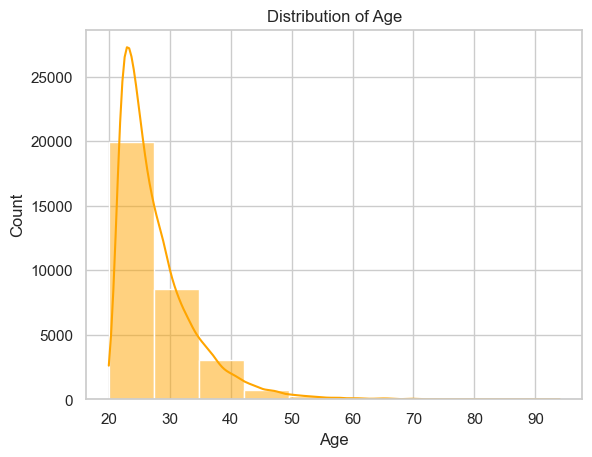

In [50]:
# Histogram of age
sns.histplot(df['person_age'], kde=True, bins=10,color="orange")
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()

**Most of the people who took loans are in their 20s however people in their 30s also took loans there was a smaller number of people 70 and above**

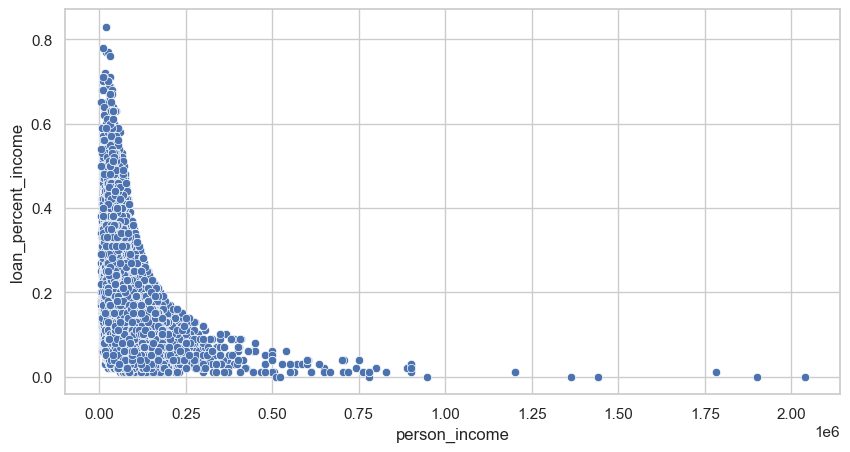

In [77]:
plt.figure(figsize=(10,5))
sns.scatterplot(y="loan_percent_income",x="person_income",data=df)
plt.show()

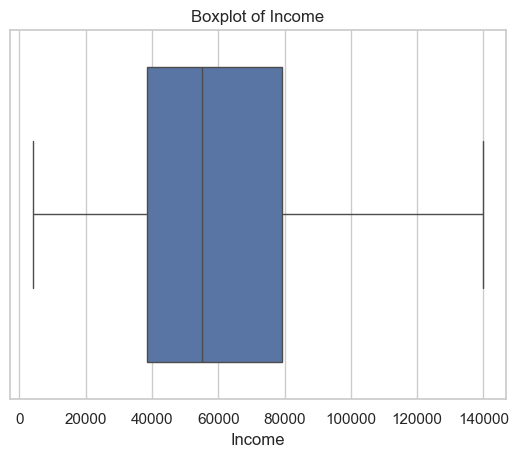

In [51]:
sns.boxplot(x=df['person_income'], orient='h',showfliers=False)
plt.xlabel('Income')
plt.title('Boxplot of Income')
plt.show()

**The income of most of the people was in the range of 40,000 and 80,000.**

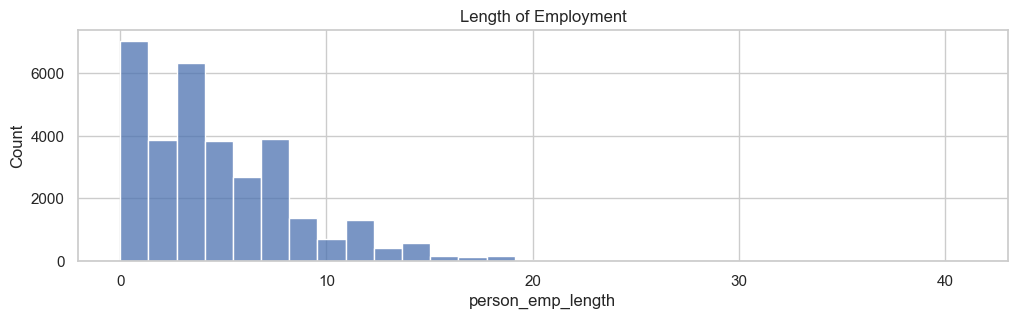

In [52]:
plt.figure(figsize=(12,3))
sns.histplot(data=df,x="person_emp_length",bins=30)
plt.title("Length of Employment")
plt.show()

**Most people have been employed for less than 10 years**

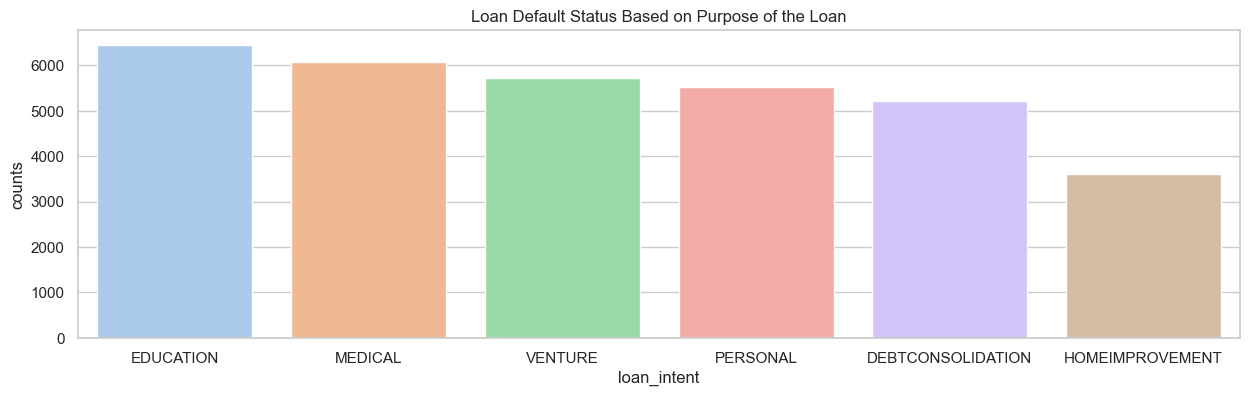

In [66]:
count=df["loan_intent"].value_counts().reset_index()
count
count.columns=['loan_intent','counts']
plt.figure(figsize=(15, 4))
sns.barplot(x="loan_intent", y="counts", palette="pastel",hue="loan_intent",ci=None,data=count)
plt.title("Loan Default Status Based on Purpose of the Loan")
plt.show()


**Majority of the loans were taken for Education,Medical Needs and Ventures with Home Improvement Being the least.**

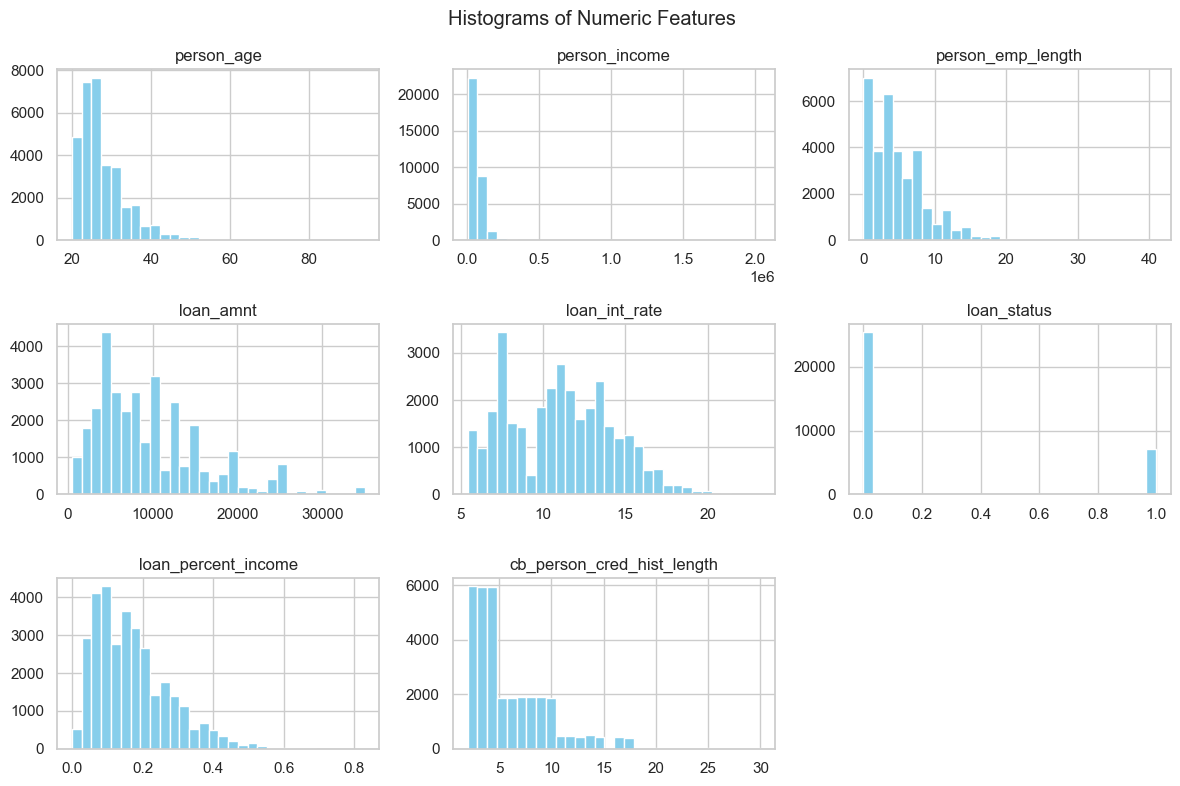

In [20]:
df.hist(bins=30, figsize=(12, 8),color="skyblue")
plt.suptitle('Histograms of Numeric Features')
plt.tight_layout()
plt.show()

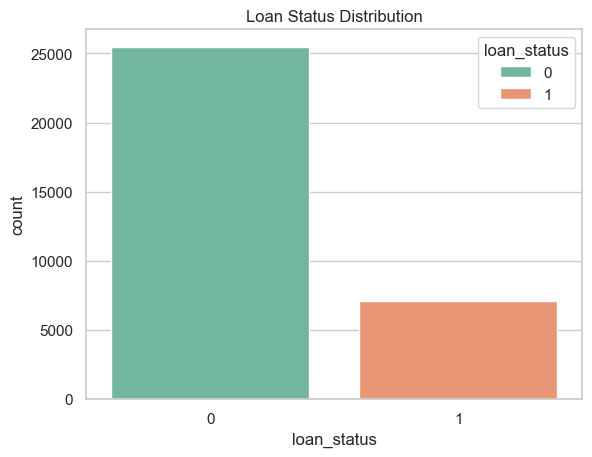

In [21]:
# Loan status count plot
sns.countplot(x='loan_status',hue="loan_status", palette="Set2",data=df)
plt.title('Loan Status Distribution')
plt.show()

**The Chart shows the Number of people who defaulted on their loans. We see that the people the defaulted on loans are less than those that did not.The Data is imbalanced**

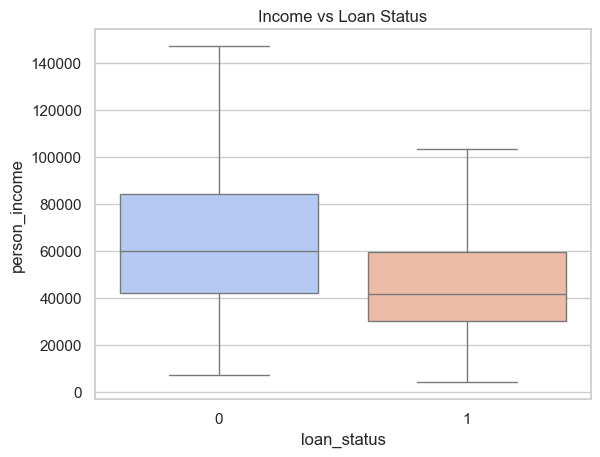

In [22]:
# Income vs loan status
sns.boxplot(x='loan_status', y='person_income',palette="coolwarm",showfliers=False, data=df)
plt.title('Income vs Loan Status')

plt.show()

**People with Higher incomes were less likely to default on their loans**

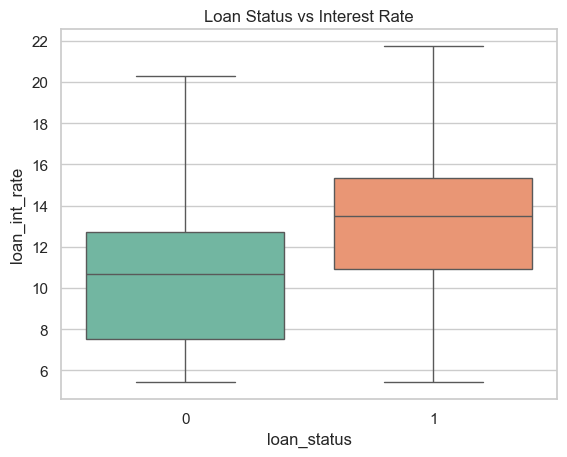

In [23]:
sns.boxplot(x='loan_status', y='loan_int_rate', data=df, palette='Set2',showfliers=False)
plt.title('Loan Status vs Interest Rate')
plt.show()


**People who defaulted on loans had higher interest rates on their loans**

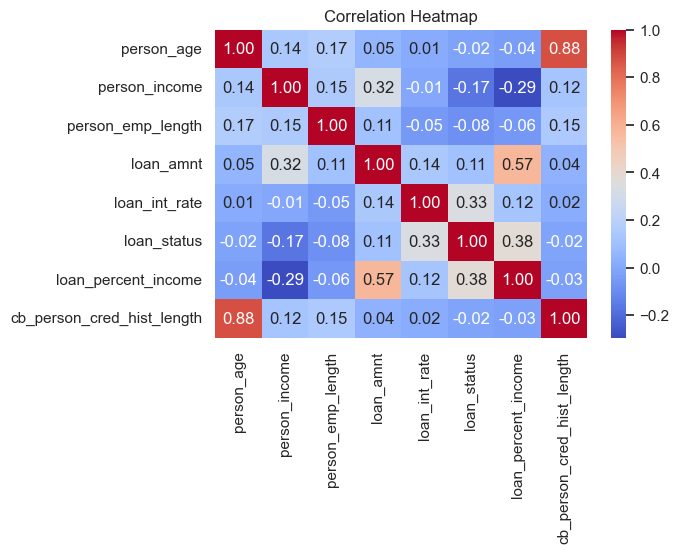

In [24]:
# Only numeric columns
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Encoding Categorical Variables

In [25]:
df.select_dtypes(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
5,OWN,VENTURE,A,N
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


In [26]:
df.to_csv("../data/data2.csv", index=False)

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
home_enc=LabelEncoder()
grade_enc=LabelEncoder()
intent_enc=LabelEncoder()
prevdefault_enc=LabelEncoder()

In [29]:
df['person_home_ownership']=home_enc.fit_transform(df['person_home_ownership'])
df['loan_grade']=grade_enc.fit_transform(df['loan_grade'])
df['loan_intent']=intent_enc.fit_transform(df['loan_intent'])
df['cb_person_default_on_file']=prevdefault_enc.fit_transform(df['cb_person_default_on_file'])

In [30]:
print("Home Ownership Encoding:")
for i, label in enumerate(home_enc.classes_):
    print(f"{label}: {i}")

print("\nLoan Grade Encoding:")
for i, label in enumerate(grade_enc.classes_):
    print(f"{label}: {i}")

print("\nLoan Purpose Encoding:")
for i, label in enumerate(intent_enc.classes_):
    print(f"{label}: {i}")

print("\nPrevious Default Encoding:")
for i, label in enumerate(prevdefault_enc.classes_):
    print(f"{label}: {i}")


Home Ownership Encoding:
MORTGAGE: 0
OTHER: 1
OWN: 2
RENT: 3

Loan Grade Encoding:
A: 0
B: 1
C: 2
D: 3
E: 4
F: 5
G: 6

Loan Purpose Encoding:
DEBTCONSOLIDATION: 0
EDUCATION: 1
HOMEIMPROVEMENT: 2
MEDICAL: 3
PERSONAL: 4
VENTURE: 5

Previous Default Encoding:
N: 0
Y: 1


In [31]:
df['has_short_credit_history'] = (df['cb_person_cred_hist_length'] < 2).astype(int)

**Renaming Columns for Readability**

In [32]:
df.rename(columns={
    'person_age': 'age',
    'person_income': 'income',
    'person_home_ownership': 'home_ownership',
    'person_emp_length': 'employment_years',
    'loan_intent': 'loan_purpose',
    'loan_amnt': 'loan_amount',
    'loan_int_rate': 'interest_rate',
    'loan_status': 'default_status',
    'loan_percent_income': 'loan_to_income',
    'cb_person_default_on_file': 'has_previous_default',
    'cb_person_cred_hist_length': 'credit_history_years',
    'has_short_credit_history': 'short_credit_history'
}, inplace=True)


In [33]:
df.to_csv("../data/data1.csv", index=False)
